In [1]:
from ga.ga import Individual
import matplotlib.pyplot as plt
import numpy
import copy
from ga.mutation import mutate_one_gene, mutate_one_bit, shuffle_one_gene, invert_one_gene, switch_two_states

In [ ]:
# get random hmm gene


# do some random mutations
# check for which mutation the distance best korrelates with the 

-159.15499487258364


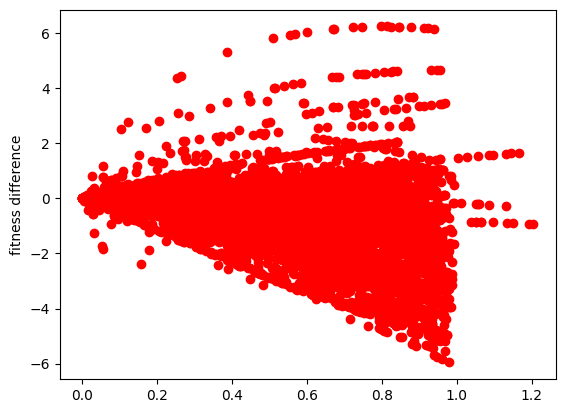

In [19]:
# make random hmm
alphabet = list('abcdefghijklmnopqrstuvwxyz')
n_states = 6
population_size = 8000


parent = Individual(n_states, alphabet)
parent.fitness = 1
parent_hmm = parent.to_hmm()
n_samples, len_samples = 1, 50 
samples = parent_hmm.sample(n_samples, len_samples)




print(parent_hmm.log_probability(samples[0]))


def flatten_2D_array(arr):
    return [x for inner in arr for x in inner]

def fitness_func(individual, ga_instance={}):
    # Wichtig!!! Da keine end_states spezifiziert wurden MUSS der zweite Parameter gesetzt werden. Sonst endlos loop
    child_hmm = individual.to_hmm()

    total_score = [child_hmm.log_probability(sample) for sample in samples]
    mean_score = sum(total_score)/len(samples)
    return mean_score

def taxicab_dist(a, b):
    genes_a= flatten_2D_array(a.genes)
    genes_b = flatten_2D_array(b.genes)
    zippety = zip(genes_a, genes_b)
    return sum([ abs(gene_a - gene_b) for (gene_a, gene_b) in zippety])


reference = Individual(n_states, alphabet)
reference.fitness = fitness_func(reference)
# reference.fitness = 
# initial_population = [Individual(n_states, alphabet) for i in range(population_size)]
initial_population = [copy.deepcopy(reference) for i in range(population_size)]

initial_population = mutate_one_bit(initial_population)

for individual in initial_population:
    individual.fitness = fitness_func(individual)


# metric_dist = []
# fitness_dist = []

dist = []


# for i in range(population_size - 1):
#     for j in range(i+1, population_size):
#         a = initial_population[i]
#         b = initial_population[j]
   
#         dist.append({
#             'metric':taxicab_dist(a, b),
#             'fitness': abs(a.fitness - b.fitness)
#         })
for child in initial_population:
    dist.append({
        'metric': taxicab_dist(reference, child),
        'fitness': child.fitness - reference.fitness
    })

# p.merint(metric_dist)
# print(fitness_dist)

# for every pair of hmms
# calculate their distance ins space
# calculate their distance in fitness


# plot distance vs fitness-distance
# fitness distance on y scale, distance on x scale
# dist = sorted(dist, key=lambda x: x['metric'])

metric_dist = [x['metric'] for x in dist]
fitness_dist = [x['fitness'] for x in dist]

plt.plot(metric_dist, fitness_dist, 'ro')
plt.ylabel('fitness difference')
plt.show()

# print(fitness_dist)
